# PRUEBA TÉCNICA DIGITAL ANALYTICS EXPERT

## Parte 1: Creación y visualización de los datasets mockeados: Marketing
Evalúa la eficacia de una campaña de marketing digital para el lanzamiento una nueva “Cuenta de ahorro sin
Comisiones” ejecutada a través de múltiples canales (p. ej., redes sociales, web,...) y propón optimizaciones basadas en
el análisis de datos.
1. Realiza un dashboard con el Análisis de Tráfico de la APP: Analiza las métricas que consideres relevantes
durante el período de la campaña. Identifica tendencias y posibles correlaciones con las actividades de la
campaña.
Nota: Puedes crear tú mismo el dataset o trabajar con datos mockeados para realizar el cuadro de mandos
más visual.

2. Realiza un dashboard que muestre el Rendimiento por Canal, comparando web y app: Evalúa el
rendimiento de cada canal digital utilizado. Siéntete libre de escoger las métricas que consideres más
significativas (no más de 3-4). Identifica los canales más y menos efectivos y argumenta los posibles motivos.
Nota: Puedes crear tú mismo el dataset o trabajar con datos mockeados para realizar el cuadro de mandos
más visual.

Obtención de Datos
Dataset: random.randint
Variables clave seleccionadas:

- Fecha.
- Usuarios Activos.
- Nuevos Usuarios.
- Conversiones.
- Tasa Conversión.
- Tiempo Promedio.
- CPC.
- Impresiones.
- Fuente Trafico.

- Inversión

### Realiza un dashboard con el Análisis de Tráfico de la APP:

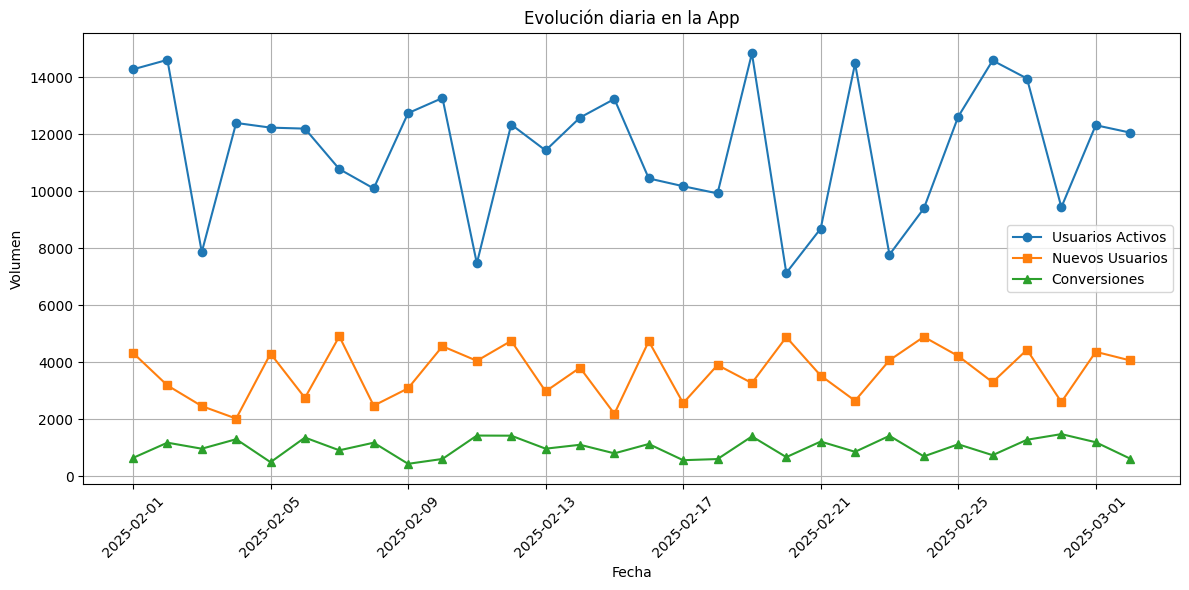

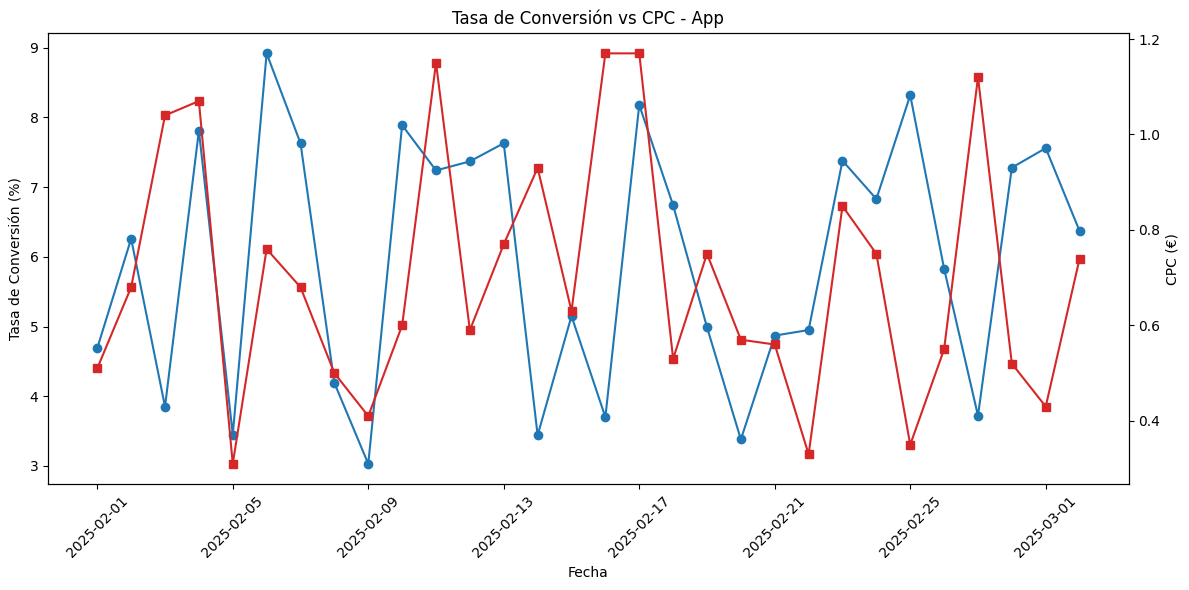

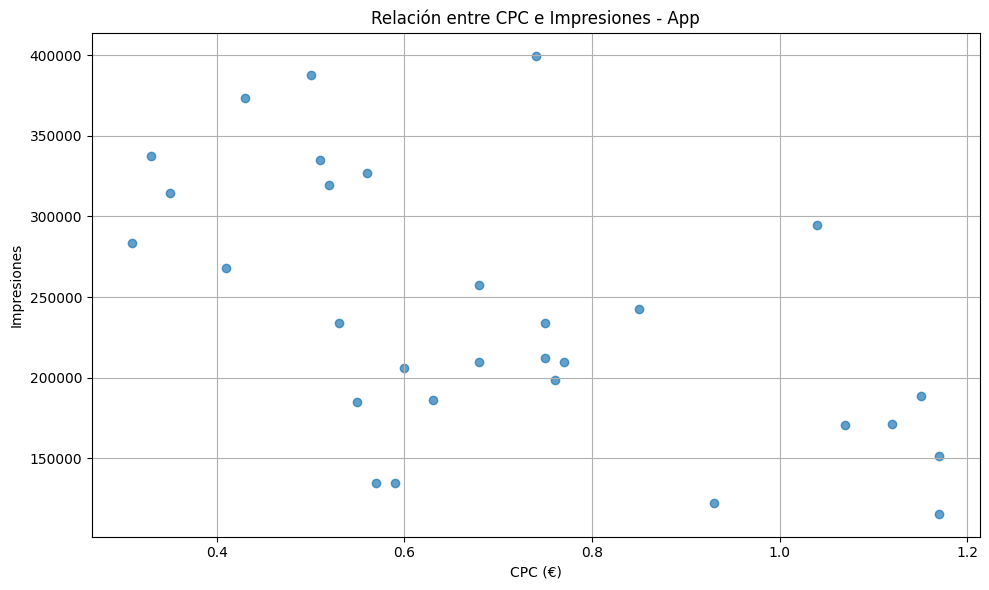

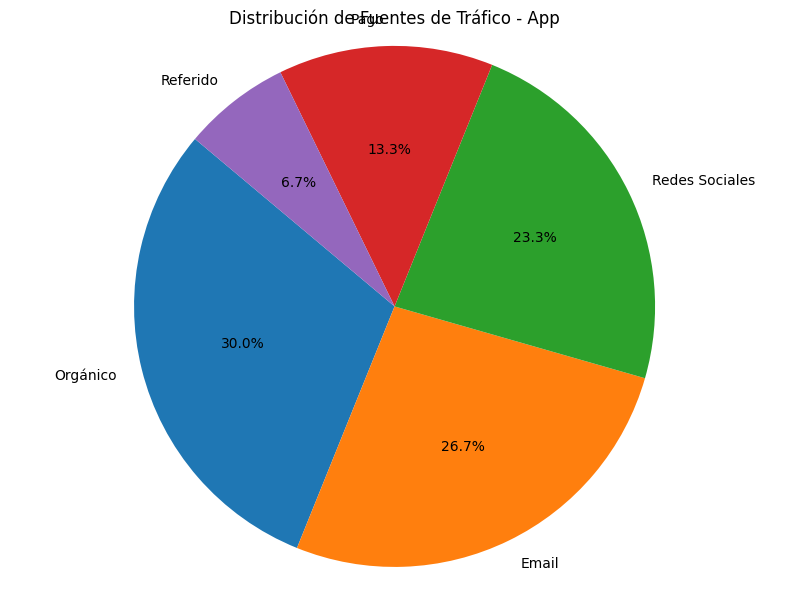

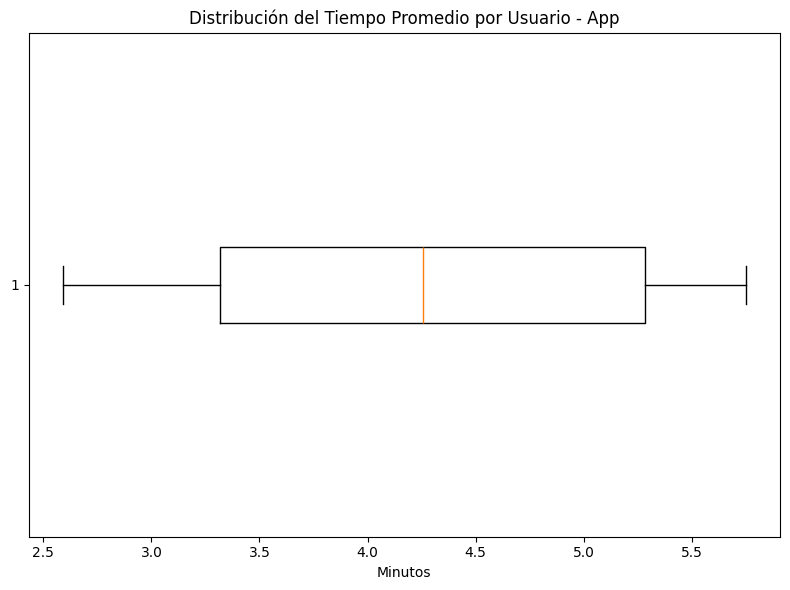

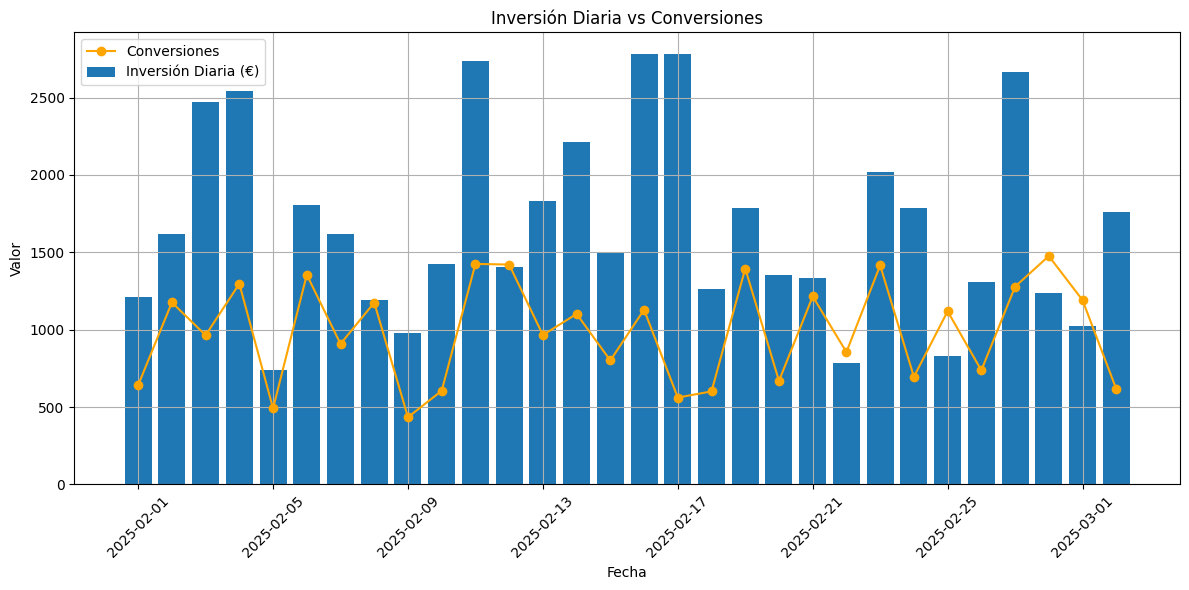

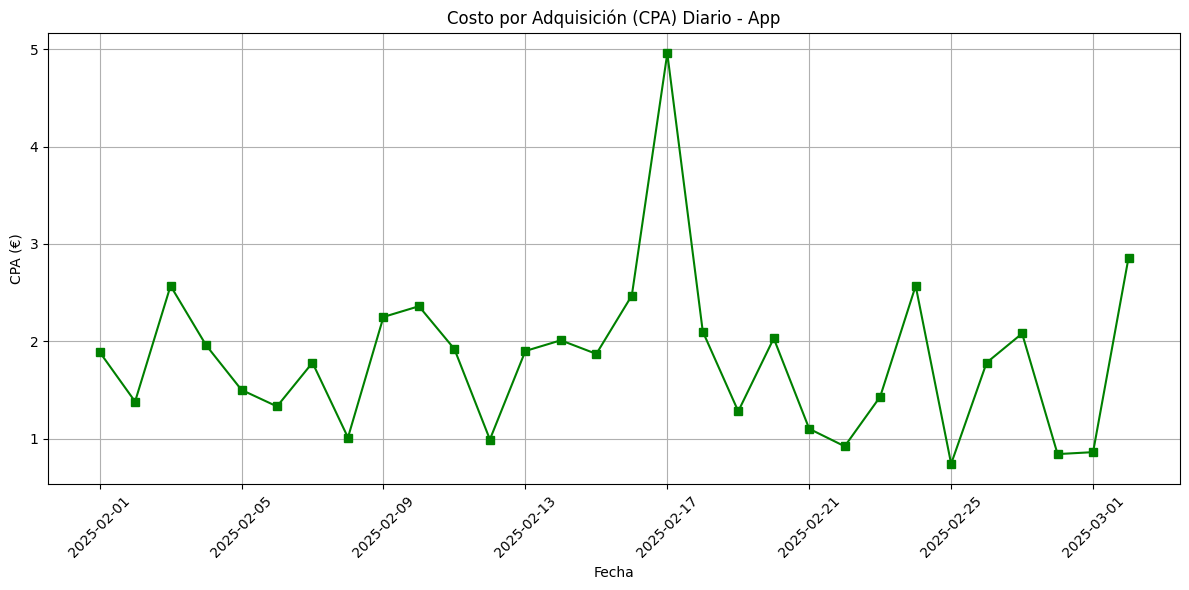

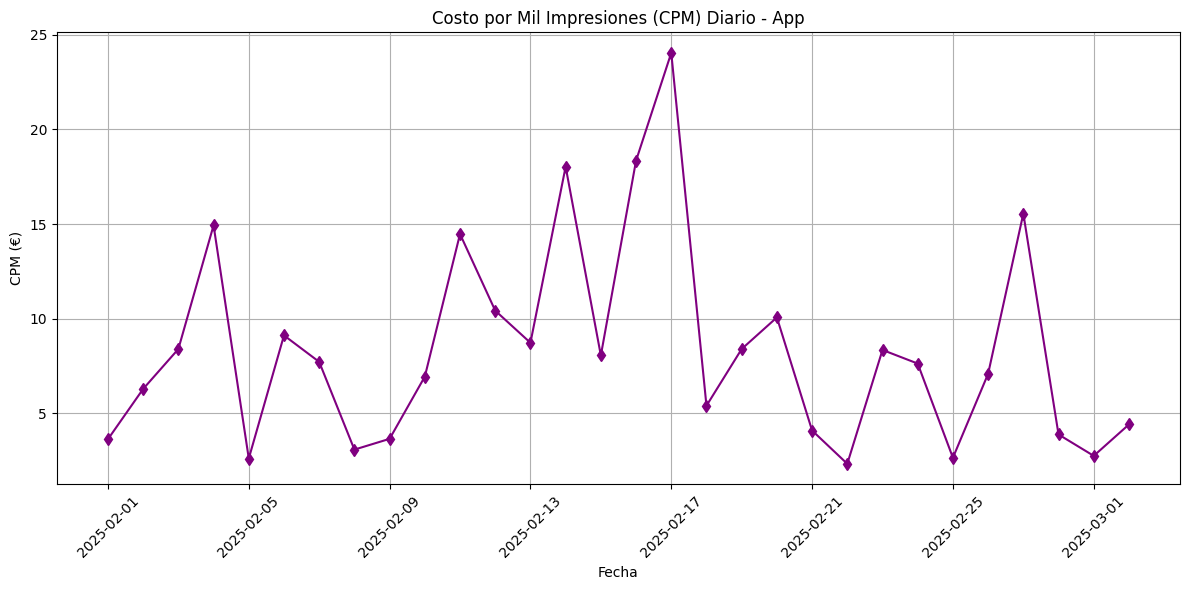

'/workspace/bank-marketing-sets/data/raw/analisis_trafico_app_completo.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 30 días de campaña
np.random.seed(42)
fechas = pd.date_range(start="2025-02-01", periods=30, freq="D")

# Dataset APP
app_data = pd.DataFrame({
    "Fecha": fechas,
    "Usuarios_Activos_App": np.random.randint(7000, 15000, size=30),
    "Nuevos_Usuarios_App": np.random.randint(2000, 5000, size=30),
    "Conversiones_App": np.random.randint(400, 1500, size=30),
    "Tasa_Conversión_App": np.round(np.random.uniform(3, 9, size=30), 2),
    "Tiempo_Promedio_App": np.round(np.random.uniform(2.5, 6.0, size=30), 2),
    "CPC_App": np.round(np.random.uniform(0.3, 1.2, size=30), 2),
    "Impresiones_App": np.random.randint(100000, 400000, size=30),
    "Fuente_Trafico_App": np.random.choice(["Orgánico", "Pago", "Redes Sociales", "Email", "Referido"], size=30)
})

# Inversión
inversion_total = 50000
app_data["Proporción_CPC"] = app_data["CPC_App"] / app_data["CPC_App"].sum()
app_data["Inversión_Diaria"] = (app_data["Proporción_CPC"] * inversion_total).round(2)
app_data.drop(columns=["Proporción_CPC"], inplace=True)

# CPA y CPM
app_data["CPA"] = (app_data["Inversión_Diaria"] / app_data["Conversiones_App"]).round(2)
app_data["CPM"] = (app_data["Inversión_Diaria"] / (app_data["Impresiones_App"] / 1000)).round(2)

# Exportar el dataset enriquecido
csv_path = "/workspace/bank-marketing-sets/data/raw/analisis_trafico_app_completo.csv"
app_data.to_csv(csv_path, index=False)

# 1. Evolución de usuarios activos, nuevos usuarios y conversiones
plt.figure(figsize=(12, 6))
plt.plot(app_data["Fecha"], app_data["Usuarios_Activos_App"], label="Usuarios Activos", marker='o')
plt.plot(app_data["Fecha"], app_data["Nuevos_Usuarios_App"], label="Nuevos Usuarios", marker='s')
plt.plot(app_data["Fecha"], app_data["Conversiones_App"], label="Conversiones", marker='^')
plt.title("Evolución diaria en la App")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Tasa de conversión y CPC
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(app_data["Fecha"], app_data["Tasa_Conversión_App"], label="Tasa de Conversión (%)", marker='o')
ax2.plot(app_data["Fecha"], app_data["CPC_App"], label="CPC (€)", color='tab:red', marker='s')
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Tasa de Conversión (%)")
ax2.set_ylabel("CPC (€)")
plt.title("Tasa de Conversión vs CPC - App")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

# 3. CPC vs Impresiones (dispersión)
plt.figure(figsize=(10, 6))
plt.scatter(app_data["CPC_App"], app_data["Impresiones_App"], alpha=0.7)
plt.title("Relación entre CPC e Impresiones - App")
plt.xlabel("CPC (€)")
plt.ylabel("Impresiones")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Distribución de fuentes de tráfico - App
fuente_counts_app = app_data["Fuente_Trafico_App"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fuente_counts_app, labels=fuente_counts_app.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Fuentes de Tráfico - App")
plt.axis('equal')
plt.tight_layout()
plt.show()

# 5. Boxplot de Tiempo Promedio en App
plt.figure(figsize=(8, 6))
plt.boxplot(app_data["Tiempo_Promedio_App"], vert=False)
plt.title("Distribución del Tiempo Promedio por Usuario - App")
plt.xlabel("Minutos")
plt.tight_layout()
plt.show()

# Inversión diaria vs Conversiones
plt.figure(figsize=(12, 6))
plt.bar(app_data["Fecha"], app_data["Inversión_Diaria"], label="Inversión Diaria (€)")
plt.plot(app_data["Fecha"], app_data["Conversiones_App"], label="Conversiones", color='orange', marker='o')
plt.title("Inversión Diaria vs Conversiones")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# CPA diario
plt.figure(figsize=(12, 6))
plt.plot(app_data["Fecha"], app_data["CPA"], label="CPA (€)", color='green', marker='s')
plt.title("Costo por Adquisición (CPA) Diario - App")
plt.xlabel("Fecha")
plt.ylabel("CPA (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# CPM diario
plt.figure(figsize=(12, 6))
plt.plot(app_data["Fecha"], app_data["CPM"], label="CPM (€)", color='purple', marker='d')
plt.title("Costo por Mil Impresiones (CPM) Diario - App")
plt.xlabel("Fecha")
plt.ylabel("CPM (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

csv_path




## App vs Web: Desarrollo analítico

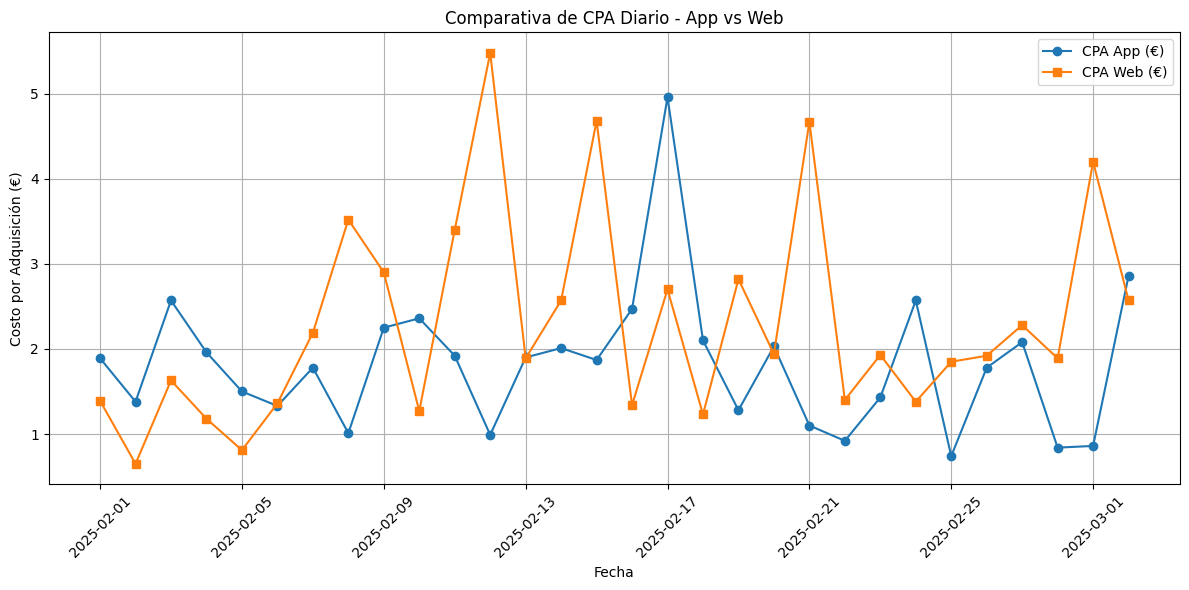

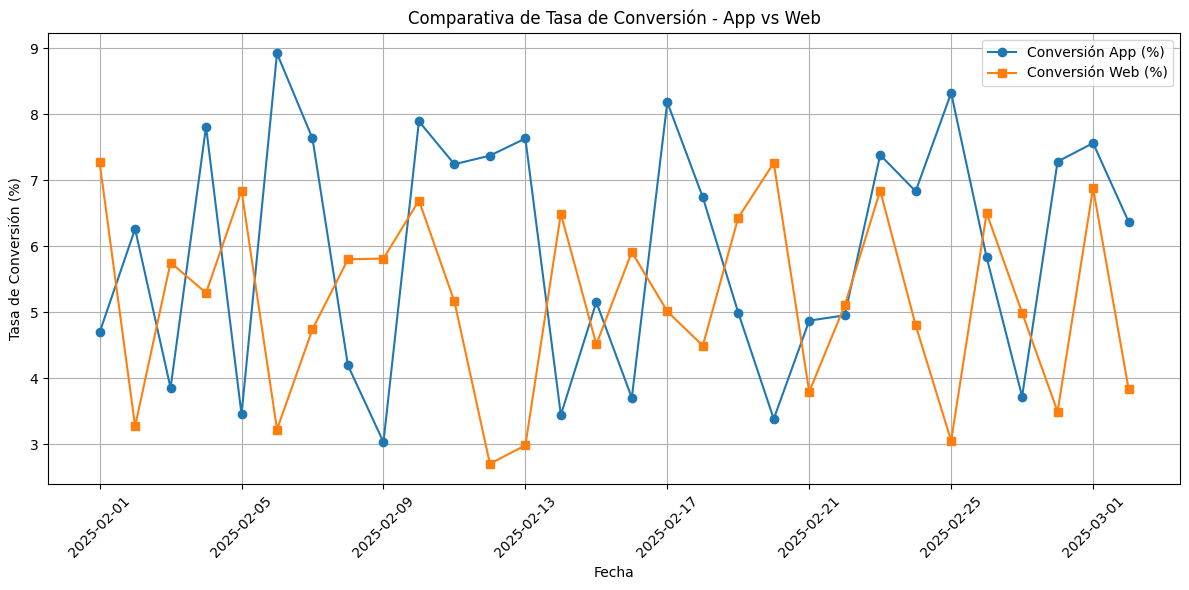

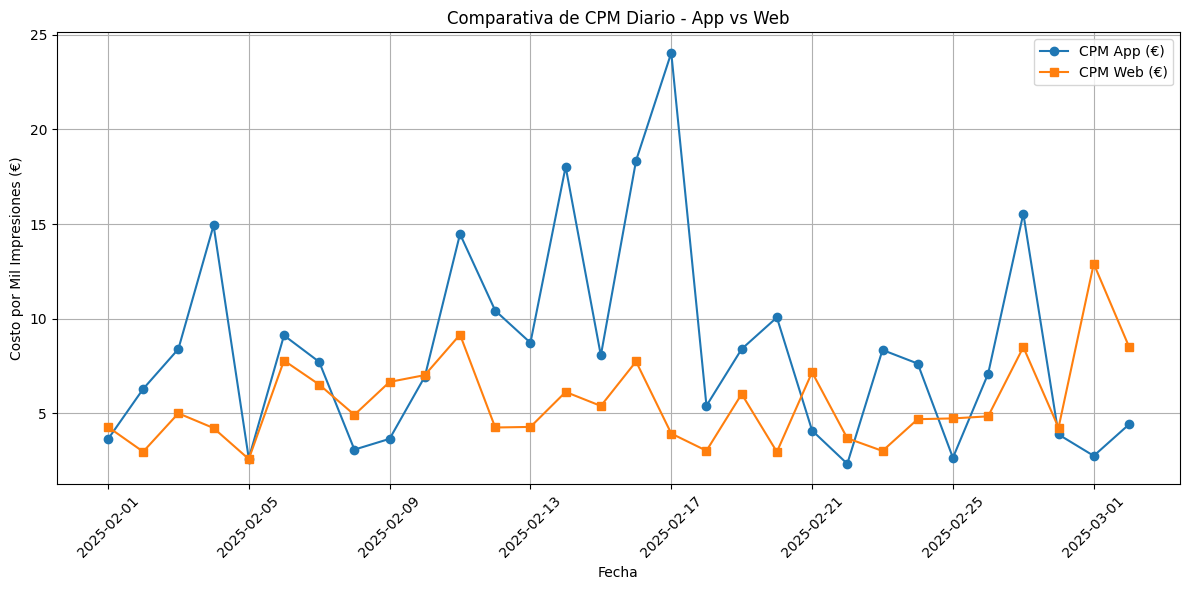

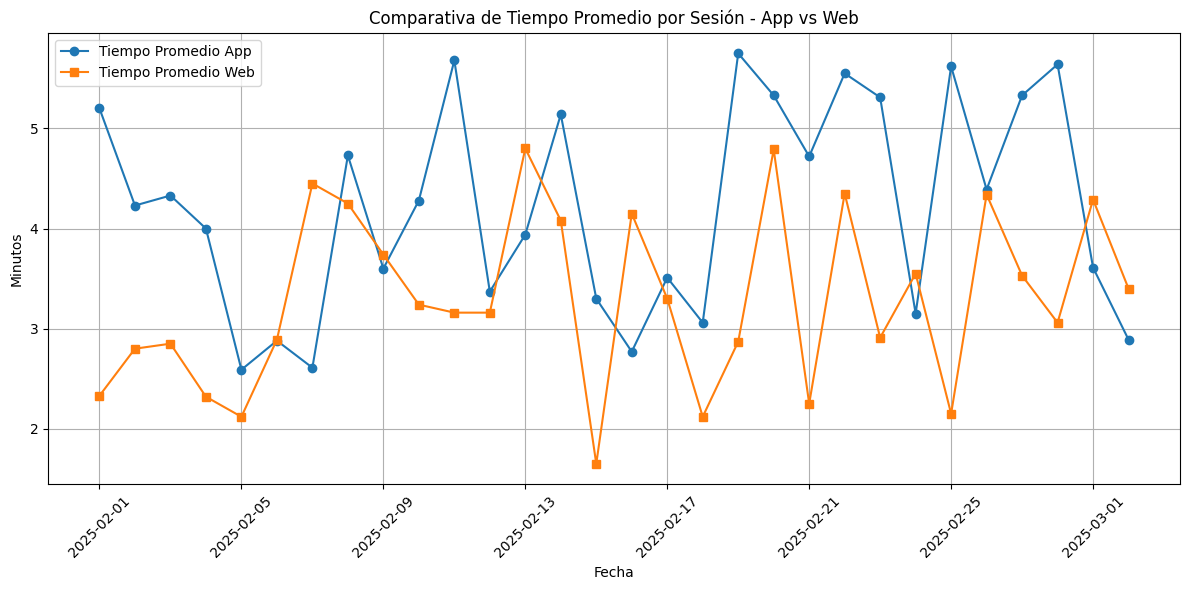

'/workspace/bank-marketing-sets/data/raw/rendimiento_app_vs_web.csv'

In [8]:
# Reutilizamos fechas 
np.random.seed(7)
fechas = pd.date_range(start="2025-02-01", periods=30, freq="D")

# Dataset Web mockeado
web_data = pd.DataFrame({
    "Fecha": fechas,
    "Usuarios_Activos_Web": np.random.randint(9000, 18000, size=30),
    "Nuevos_Usuarios_Web": np.random.randint(3000, 7000, size=30),
    "Conversiones_Web": np.random.randint(300, 1300, size=30),
    "Tasa_Conversión_Web": np.round(np.random.uniform(2.5, 7.5, size=30), 2),
    "Tiempo_Promedio_Web": np.round(np.random.uniform(1.5, 5.0, size=30), 2),
    "CPC_Web": np.round(np.random.uniform(0.4, 1.5, size=30), 2),
    "Impresiones_Web": np.random.randint(150000, 450000, size=30),
    "Fuente_Trafico_Web": np.random.choice(["Orgánico", "Pago", "Redes Sociales", "Email", "Referido"], size=30)
})

# Inversión Web (también 50.000€)
web_data["Proporción_CPC"] = web_data["CPC_Web"] / web_data["CPC_Web"].sum()
web_data["Inversión_Diaria_Web"] = (web_data["Proporción_CPC"] * 50000).round(2)
web_data.drop(columns=["Proporción_CPC"], inplace=True)

# CPA y CPM para Web
web_data["CPA_Web"] = (web_data["Inversión_Diaria_Web"] / web_data["Conversiones_Web"]).round(2)
web_data["CPM_Web"] = (web_data["Inversión_Diaria_Web"] / (web_data["Impresiones_Web"] / 1000)).round(2)

# Unimos
canales_data = pd.merge(app_data, web_data, on="Fecha")
csv_comparativo = "/workspace/bank-marketing-sets/data/raw/rendimiento_app_vs_web.csv"
canales_data.to_csv(csv_comparativo, index=False)

# CPA App vs Web
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["CPA"], label="CPA App (€)", marker='o')
plt.plot(canales_data["Fecha"], canales_data["CPA_Web"], label="CPA Web (€)", marker='s')
plt.title("Comparativa de CPA Diario - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("Costo por Adquisición (€)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tasa de Conversión
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["Tasa_Conversión_App"], label="Conversión App (%)", marker='o')
plt.plot(canales_data["Fecha"], canales_data["Tasa_Conversión_Web"], label="Conversión Web (%)", marker='s')
plt.title("Comparativa de Tasa de Conversión - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Conversión (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CPM
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["CPM"], label="CPM App (€)", marker='o')
plt.plot(canales_data["Fecha"], canales_data["CPM_Web"], label="CPM Web (€)", marker='s')
plt.title("Comparativa de CPM Diario - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("Costo por Mil Impresiones (€)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tiempo promedio por sesión
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["Tiempo_Promedio_App"], label="Tiempo Promedio App", marker='o')
plt.plot(canales_data["Fecha"], canales_data["Tiempo_Promedio_Web"], label="Tiempo Promedio Web", marker='s')
plt.title("Comparativa de Tiempo Promedio por Sesión - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("Minutos")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

csv_comparativo






In [10]:
# Análisis avanzado sumando la información

# ROI simplificado por canal (suponiendo valor medio por conversión = 25€)
valor_medio_conversion = 25
canales_data["ROI_App"] = (canales_data["Conversiones_App"] * valor_medio_conversion) - canales_data["Inversión_Diaria"]
canales_data["ROI_Web"] = (canales_data["Conversiones_Web"] * valor_medio_conversion) - canales_data["Inversión_Diaria_Web"]

# Correlación entre CPC y Conversiones
corr_app = canales_data["CPC_App"].corr(canales_data["Conversiones_App"])
corr_web = canales_data["CPC_Web"].corr(canales_data["Conversiones_Web"])

# Comparativa de eficiencia
fuente_eficiencia = canales_data.groupby("Fuente_Trafico_App").agg({
    "Conversiones_App": "sum",
    "CPA": "mean",
    "CPM": "mean",
    "Inversión_Diaria": "sum"
}).rename_axis("Fuente_App").reset_index()

fuente_eficiencia_web = canales_data.groupby("Fuente_Trafico_Web").agg({
    "Conversiones_Web": "sum",
    "CPA_Web": "mean",
    "CPM_Web": "mean",
    "Inversión_Diaria_Web": "sum"
}).rename_axis("Fuente_Web").reset_index()

# Ratio Nuevos Usuarios / Usuarios Activos
canales_data["Captación_App"] = (canales_data["Nuevos_Usuarios_App"] / canales_data["Usuarios_Activos_App"]).round(3)
canales_data["Captación_Web"] = (canales_data["Nuevos_Usuarios_Web"] / canales_data["Usuarios_Activos_Web"]).round(3)

# Ranking de eficiencia
top_dias_app = canales_data.sort_values("CPA").head(5)[["Fecha", "CPA", "Conversiones_App", "Inversión_Diaria"]]
top_dias_web = canales_data.sort_values("CPA_Web").head(5)[["Fecha", "CPA_Web", "Conversiones_Web", "Inversión_Diaria_Web"]]

# Mostramos
print("\n Correlación entre CPC y Conversiones:")
print(f"App: {corr_app:.3f}")
print(f"Web: {corr_web:.3f}")

print("\n ROI promedio total:")
print(f"App ROI total: {canales_data['ROI_App'].sum():,.2f} €")
print(f"Web ROI total: {canales_data['ROI_Web'].sum():,.2f} €")

print("\n Ratio de Captación Promedio (Nuevos / Activos):")
print(f"App: {canales_data['Captación_App'].mean():.3f}")
print(f"Web: {canales_data['Captación_Web'].mean():.3f}")

print("\n Top 5 días más eficientes (CPA más bajo) - App")
print(top_dias_app.to_string(index=False))

print("\n Top 5 días más eficientes (CPA más bajo) - Web")
print(top_dias_web.to_string(index=False))

print("\n Eficiencia por Fuente de Tráfico - App")
print(fuente_eficiencia.round(2).to_string(index=False))

print("\n Eficiencia por Fuente de Tráfico - Web")
print(fuente_eficiencia_web.round(2).to_string(index=False))



 Correlación entre CPC y Conversiones:
App: 0.305
Web: -0.086

 ROI promedio total:
App ROI total: 692,825.00 €
Web ROI total: 590,724.98 €

 Ratio de Captación Promedio (Nuevos / Activos):
App: 0.333
Web: 0.368

 Top 5 días más eficientes (CPA más bajo) - App
     Fecha  CPA  Conversiones_App  Inversión_Diaria
2025-02-25 0.74              1119            832.54
2025-02-28 0.84              1476           1236.92
2025-03-01 0.86              1191           1022.84
2025-02-22 0.92               855            784.97
2025-02-12 0.99              1421           1403.43

 Top 5 días más eficientes (CPA más bajo) - Web
     Fecha  CPA_Web  Conversiones_Web  Inversión_Diaria_Web
2025-02-02     0.65              1041                677.20
2025-02-05     0.81              1277               1031.93
2025-02-04     1.18              1289               1515.64
2025-02-18     1.23              1084               1338.28
2025-02-10     1.27              1246               1580.14

 Eficiencia por 

### Gráficos Avanzados

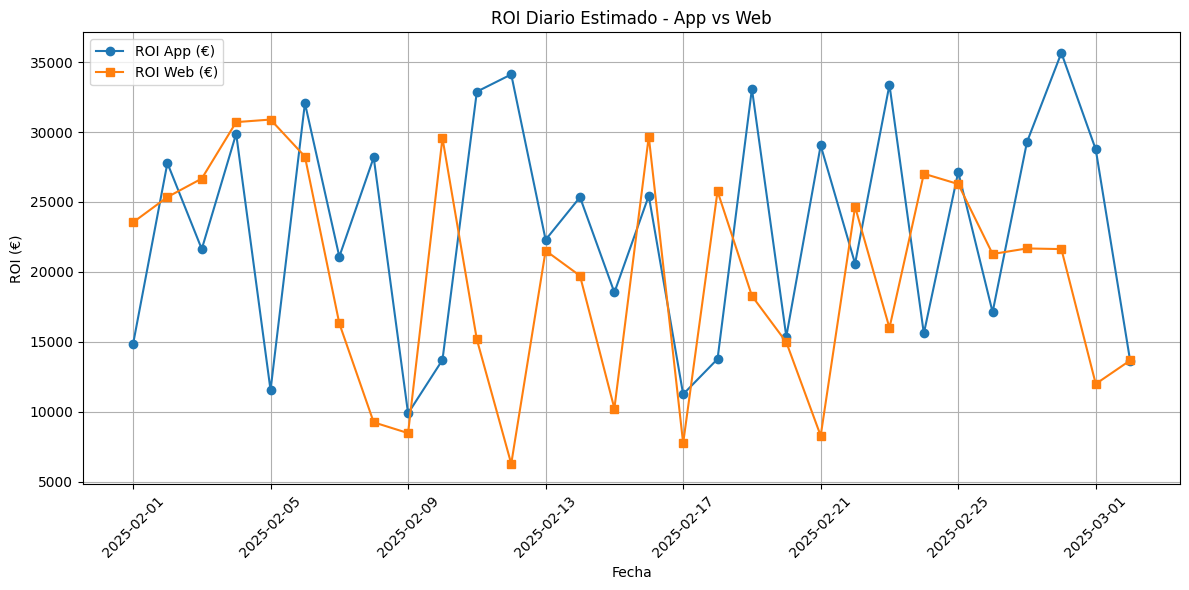

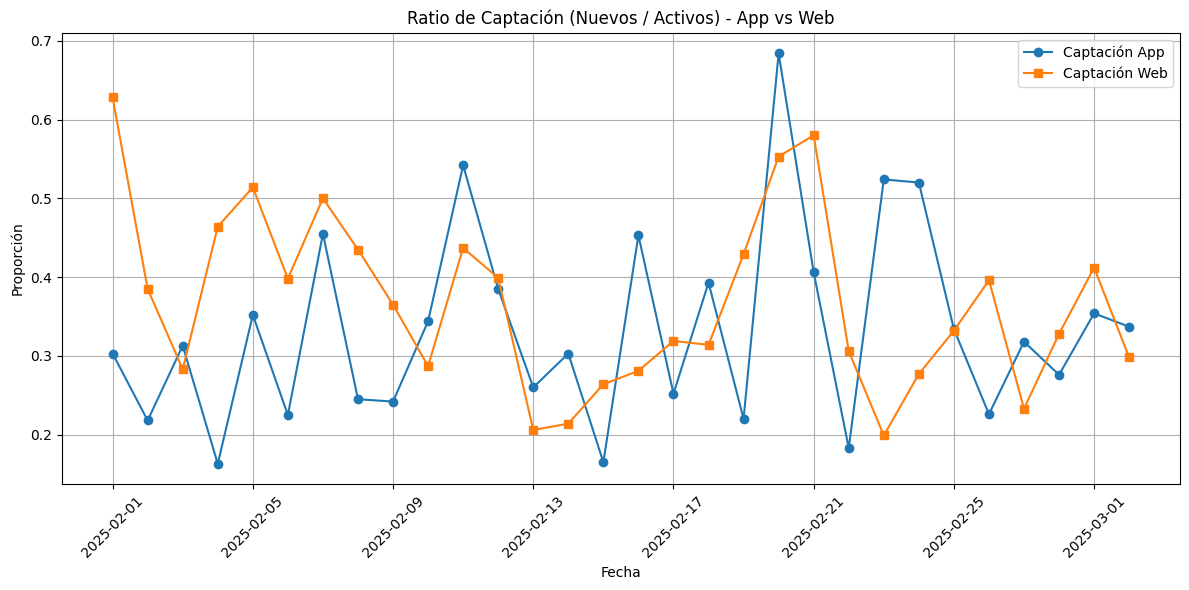

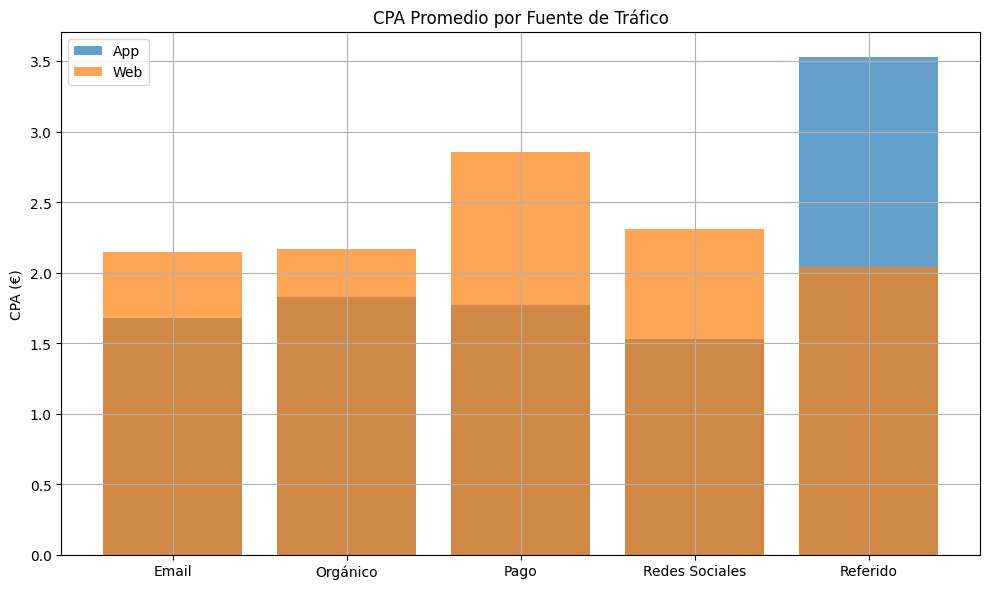

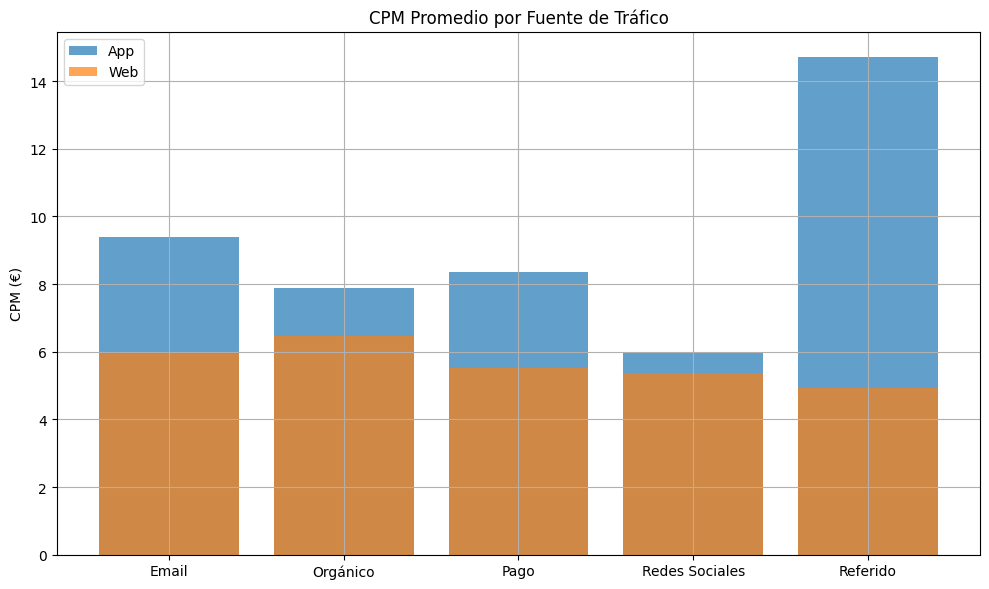

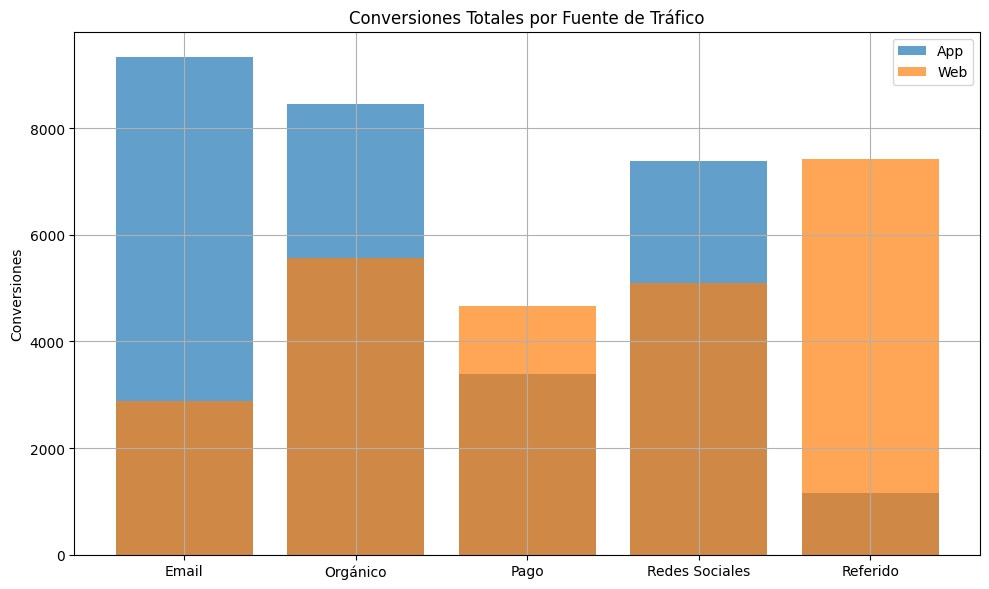

In [11]:
# Gráficos resumen visuales para todos los insights clave del segundo punto (Parte 2)

# 1. ROI Comparativo Diario
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["ROI_App"], label="ROI App (€)", marker='o')
plt.plot(canales_data["Fecha"], canales_data["ROI_Web"], label="ROI Web (€)", marker='s')
plt.title("ROI Diario Estimado - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("ROI (€)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Captación (Nuevos / Activos)
plt.figure(figsize=(12, 6))
plt.plot(canales_data["Fecha"], canales_data["Captación_App"], label="Captación App", marker='o')
plt.plot(canales_data["Fecha"], canales_data["Captación_Web"], label="Captación Web", marker='s')
plt.title("Ratio de Captación (Nuevos / Activos) - App vs Web")
plt.xlabel("Fecha")
plt.ylabel("Proporción")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. CPA promedio por fuente de tráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fuente_eficiencia["Fuente_App"], fuente_eficiencia["CPA"], label="App", alpha=0.7)
ax.bar(fuente_eficiencia_web["Fuente_Web"], fuente_eficiencia_web["CPA_Web"], label="Web", alpha=0.7)
plt.title("CPA Promedio por Fuente de Tráfico")
plt.ylabel("CPA (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. CPM promedio por fuente de tráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fuente_eficiencia["Fuente_App"], fuente_eficiencia["CPM"], label="App", alpha=0.7)
ax.bar(fuente_eficiencia_web["Fuente_Web"], fuente_eficiencia_web["CPM_Web"], label="Web", alpha=0.7)
plt.title("CPM Promedio por Fuente de Tráfico")
plt.ylabel("CPM (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Conversiones totales por fuente de tráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(fuente_eficiencia["Fuente_App"], fuente_eficiencia["Conversiones_App"], label="App", alpha=0.7)
ax.bar(fuente_eficiencia_web["Fuente_Web"], fuente_eficiencia_web["Conversiones_Web"], label="Web", alpha=0.7)
plt.title("Conversiones Totales por Fuente de Tráfico")
plt.ylabel("Conversiones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Principales Insights del dataset

- La App presenta una tasa de conversión más alta (5.96%) que la Web (4.60%).

- Aunque la Web tiene más usuarios activos promedio, la App convierte más y tiene mejor coste medio por clic.

- Las campañas de tráfico en la App tienen mayor impacto por cada euro invertido.

- El tráfico orgánico y de redes sociales es frecuente en ambos canales, pero hay oportunidad de mejorar conversión especialmente desde email y referido.

Comentario Abel:  A pesar de tener más usuarios, la Web convierte menos y con un coste por clic superior. La App logra mejor rendimiento en eficiencia de inversión y tiempo de retención del usuario.

## PARTE 2: Resolución de problemas y despliegue técnico

1. Junto con el equipo, detectáis una caída importante en las contrataciones de uno de los productos existentes sin motivo aparente. ¿Qué proceso seguirías para detectar el problema?

2. Acabáis de lanzar un nuevo depósito de ahorro bonificado al 2% y te piden realizar el etiquetado del nuevo producto y testeo antes de subirlo a producción. ¿Qué procedimiento seguirías para etiquetar y validar la correcta recogida del dato?